#### Assignment 7

Text Analytics
1. Extract Sample document and apply following document preprocessing methods:
Tokenization, POS Tagging, stop words removal, Stemming and Lemmatization.
2. Create representation of document by calculating Term Frequency and Inverse Document
Frequency.
Provide the codes with outputs and explain everything that you do in this step.



### Assignment 7 

## Import Libraries

In [287]:
#!pip install Document

In [288]:
#!pip install spacy
#!python -m spacy download Lemmatizer


#!pip install docx
#!pip install python-docx
#!pip install -U spacy

#!python -m spacy download en_core_web_sm

In [289]:
import numpy as np   
import pandas as pd    
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import spacy
nlp = spacy.load('en_core_web_sm')
import document
from docx import Document
import warnings
warnings.filterwarnings('ignore')
import docx2txt

## Load and review data

In [290]:
path = 'testdoc.docx'
text = docx2txt.process(path)
#print(text)
path2 = 'testdoc2.docx'
text2 = docx2txt.process(path2)
#print(text2)

In [291]:
doc = nlp(text)
# Extract tokens for the given doc
print ([token.text for token in doc])
print(len(doc))
doc2 = nlp(text2)
print(len(text2))
corpus = [doc,doc2]

['Millions', 'of', 'people', 'in', 'India', 'took', 'part', 'in', 'an', 'annual', 'tree', 'planting', 'drive', 'Sunday', '.', 'More', 'than', '250', 'million', 'saplings', 'were', 'planted', 'in', 'a', 'single', 'day', 'across', 'the', 'country', "'s", 'most', '-', 'populous', 'state', '.', '\n\n', 'The', 'campaign', 'was', 'led', 'by', 'Uttar', 'Pradesh', 'state', 'government', 'officials', ',', 'lawmakers', ',', 'and', 'activists', ',', 'in', 'a', 'bid', 'to', 'reduce', 'carbon', 'emissions', 'and', 'combat', 'climate', 'change', '.', '\n\n', 'Where', 'were', 'the', 'trees', 'planted', '?', '\n\n', 'The', 'saplings', 'were', 'planted', 'by', 'volunteers', 'in', 'forests', ',', 'farms', ',', 'schools', ',', 'and', 'along', 'riverbanks', 'and', 'highways', '.', '\n\n', '"', 'We', 'are', 'committed', 'to', 'increasing', 'the', 'forest', 'cover', 'of', 'Uttar', 'Pradesh', 'to', 'over', '15', '%', 'of', 'the', 'total', 'land', 'area', 'in', 'the', 'next', 'five', 'years', ',', "''", 'said

In [292]:
sentences = list(doc.sents)
print(len(sentences))

21


In [293]:
for token in doc:
     print ("\n",token, token.idx, token.text_with_ws,
            token.is_alpha, token.is_punct, token.is_space,
            token.shape_, token.is_stop)


 Millions 0 Millions  True False False Xxxxx False

 of 9 of  True False False xx True

 people 12 people  True False False xxxx False

 in 19 in  True False False xx True

 India 22 India  True False False Xxxxx False

 took 28 took  True False False xxxx False

 part 33 part  True False False xxxx True

 in 38 in  True False False xx True

 an 41 an  True False False xx True

 annual 44 annual  True False False xxxx False

 tree 51 tree  True False False xxxx False

 planting 56 planting  True False False xxxx False

 drive 65 drive  True False False xxxx False

 Sunday 71 Sunday True False False Xxxxx False

 . 77 .  False True False . False

 More 79 More  True False False Xxxx True

 than 84 than  True False False xxxx True

 250 89 250  False False False ddd False

 million 93 million  True False False xxxx False

 saplings 101 saplings  True False False xxxx False

 were 110 were  True False False xxxx True

 planted 115 planted  True False False xxxx False

 in 123 in  True Fa

 2.89 1100 2.89 False False False d.dd False

 % 1104 % False True False % False

 , 1105 , False True False , False

 " 1106 "  False True False " False

 the 1108 the  True False False xxx True

 official 1112 official  True False False xxxx False

 said 1121 said True False False xxxx False

 , 1125 ,  False True False , False

 citing 1127 citing  True False False xxxx False

 the 1134 the  True False False xxx True

 2019 1138 2019  False False False dddd False

 Forest 1143 Forest  True False False Xxxxx False

 Survey 1150 Survey  True False False Xxxxx False

 of 1157 of  True False False xx True

 India 1160 India  True False False Xxxxx False

 report 1166 report True False False xxxx False

 . 1172 . False True False . False

 

 1173 

 False False True 

 False

 How 1175 How  True False False Xxx True

 many 1179 many  True False False xxxx True

 saplings 1184 saplings  True False False xxxx False

 survive 1193 survive True False False xxxx False

 ? 1200 ? False True F

In [294]:
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS

len(spacy_stopwords)

326

In [295]:
words = [word.lemma_ for word in doc]
print(words)

['million', 'of', 'people', 'in', 'India', 'take', 'part', 'in', 'an', 'annual', 'tree', 'planting', 'drive', 'Sunday', '.', 'More', 'than', '250', 'million', 'sapling', 'be', 'plant', 'in', 'a', 'single', 'day', 'across', 'the', 'country', "'s", 'most', '-', 'populous', 'state', '.', '\n\n', 'the', 'campaign', 'be', 'lead', 'by', 'Uttar', 'Pradesh', 'state', 'government', 'official', ',', 'lawmaker', ',', 'and', 'activist', ',', 'in', 'a', 'bid', 'to', 'reduce', 'carbon', 'emission', 'and', 'combat', 'climate', 'change', '.', '\n\n', 'where', 'be', 'the', 'tree', 'plant', '?', '\n\n', 'the', 'sapling', 'be', 'plant', 'by', 'volunteer', 'in', 'forest', ',', 'farm', ',', 'school', ',', 'and', 'along', 'riverbank', 'and', 'highway', '.', '\n\n', '"', 'we', 'be', 'committed', 'to', 'increase', 'the', 'forest', 'cover', 'of', 'Uttar', 'Pradesh', 'to', 'over', '15', '%', 'of', 'the', 'total', 'land', 'area', 'in', 'the', 'next', 'five', 'year', ',', "''", 'say', 'state', 'forest', 'official

In [296]:
vocabulary = []
vocabulary =  " ".join([word.lemma_ for word in doc if word not in spacy_stopwords])
print(vocabulary)

million of people in India take part in an annual tree planting drive Sunday . More than 250 million sapling be plant in a single day across the country 's most - populous state . 

 the campaign be lead by Uttar Pradesh state government official , lawmaker , and activist , in a bid to reduce carbon emission and combat climate change . 

 where be the tree plant ? 

 the sapling be plant by volunteer in forest , farm , school , and along riverbank and highway . 

 " we be committed to increase the forest cover of Uttar Pradesh to over 15 % of the total land area in the next five year , '' say state forest official Manoj Singh . 

 accord to another government official , the forest cover of the state have increase over the last few year . 

 " there have be an increase of 127 sqare kilometer [ 79 sqare mile ]   in the forest cover in Uttar Pradesh as compare to 2017 , " a state government spokesperson be quote as say in   the Indian Express newspaper . 

 " there have also be an increas

In [297]:
for token in doc:
    print(token, token.pos_)

Millions NOUN
of ADP
people NOUN
in ADP
India PROPN
took VERB
part NOUN
in ADP
an DET
annual ADJ
tree NOUN
planting NOUN
drive NOUN
Sunday PROPN
. PUNCT
More ADJ
than ADP
250 NUM
million NUM
saplings NOUN
were AUX
planted VERB
in ADP
a DET
single ADJ
day NOUN
across ADP
the DET
country NOUN
's PART
most ADV
- PUNCT
populous ADJ
state NOUN
. PUNCT


 SPACE
The DET
campaign NOUN
was AUX
led VERB
by ADP
Uttar PROPN
Pradesh PROPN
state NOUN
government NOUN
officials NOUN
, PUNCT
lawmakers NOUN
, PUNCT
and CCONJ
activists NOUN
, PUNCT
in ADP
a DET
bid NOUN
to PART
reduce VERB
carbon NOUN
emissions NOUN
and CCONJ
combat NOUN
climate NOUN
change NOUN
. PUNCT


 SPACE
Where SCONJ
were AUX
the DET
trees NOUN
planted VERB
? PUNCT


 SPACE
The DET
saplings NOUN
were AUX
planted VERB
by ADP
volunteers NOUN
in ADP
forests NOUN
, PUNCT
farms NOUN
, PUNCT
schools NOUN
, PUNCT
and CCONJ
along ADP
riverbanks NOUN
and CCONJ
highways NOUN
. PUNCT


 SPACE
" PUNCT
We PRON
are AUX
committed ADJ
to ADP
incr

In [298]:
verbs = [token.text for token in doc if token.pos_ == "VERB"]
nouns = [token.text for token in doc if token.pos_ == "NOUN"]
print('Verbs ',len(verbs),'Nouns ',len(nouns))
print('Verbs ',verbs)

Verbs  43 Nouns  113
Verbs  ['took', 'planted', 'led', 'reduce', 'planted', 'planted', 'increasing', 'said', 'According', 'increased', 'compared', 'quoted', 'saying', 'increased', 'compared', 'said', 'citing', 'survive', 'said', 'remains', 'adding', 'survive', 'disease', 'said', 'planted', 'survived', 'carried', 'tagged', 'ascertain', 'happened', 'told', 'carry', 'maintain', 'verify', 'survived', 'formed', 'monitor', 'said', 'vowed', 'have', 'allocated', 'growing', 'put']


In [299]:
for token in doc:
    print(token, token.lemma_)

Millions million
of of
people people
in in
India India
took take
part part
in in
an an
annual annual
tree tree
planting planting
drive drive
Sunday Sunday
. .
More More
than than
250 250
million million
saplings sapling
were be
planted plant
in in
a a
single single
day day
across across
the the
country country
's 's
most most
- -
populous populous
state state
. .


 


The the
campaign campaign
was be
led lead
by by
Uttar Uttar
Pradesh Pradesh
state state
government government
officials official
, ,
lawmakers lawmaker
, ,
and and
activists activist
, ,
in in
a a
bid bid
to to
reduce reduce
carbon carbon
emissions emission
and and
combat combat
climate climate
change change
. .


 


Where where
were be
the the
trees tree
planted plant
? ?


 


The the
saplings sapling
were be
planted plant
by by
volunteers volunteer
in in
forests forest
, ,
farms farm
, ,
schools school
, ,
and and
along along
riverbanks riverbank
and and
highways highway
. .


 


" "
We we
are be
committed committed

In [300]:
import nltk
from nltk.stem import WordNetLemmatizer,PorterStemmer

In [301]:
words = []
 
words = " ".join(token.text for token in doc)
words

'Millions of people in India took part in an annual tree planting drive Sunday . More than 250 million saplings were planted in a single day across the country \'s most - populous state . \n\n The campaign was led by Uttar Pradesh state government officials , lawmakers , and activists , in a bid to reduce carbon emissions and combat climate change . \n\n Where were the trees planted ? \n\n The saplings were planted by volunteers in forests , farms , schools , and along riverbanks and highways . \n\n " We are committed to increasing the forest cover of Uttar Pradesh to over 15 % of the total land area in the next five years , \'\' said state forest official Manoj Singh . \n\n According to another government official , the forest cover of the state has increased over the last few years . \n\n " There has been an increase of 127 sqare kilometers [ 79 sqare miles ] \xa0 in the forest cover in Uttar Pradesh as compared to 2017 , " a state government spokesperson was quoted as saying in \xa0

In [302]:
ps = PorterStemmer()
stemmed_words = []
for token in doc:
    stemmed_words.append(ps.stem(token.text))
    

In [303]:
stemmed_words

['million',
 'of',
 'peopl',
 'in',
 'india',
 'took',
 'part',
 'in',
 'an',
 'annual',
 'tree',
 'plant',
 'drive',
 'sunday',
 '.',
 'more',
 'than',
 '250',
 'million',
 'sapl',
 'were',
 'plant',
 'in',
 'a',
 'singl',
 'day',
 'across',
 'the',
 'countri',
 "'s",
 'most',
 '-',
 'popul',
 'state',
 '.',
 '\n\n',
 'the',
 'campaign',
 'wa',
 'led',
 'by',
 'uttar',
 'pradesh',
 'state',
 'govern',
 'offici',
 ',',
 'lawmak',
 ',',
 'and',
 'activist',
 ',',
 'in',
 'a',
 'bid',
 'to',
 'reduc',
 'carbon',
 'emiss',
 'and',
 'combat',
 'climat',
 'chang',
 '.',
 '\n\n',
 'where',
 'were',
 'the',
 'tree',
 'plant',
 '?',
 '\n\n',
 'the',
 'sapl',
 'were',
 'plant',
 'by',
 'volunt',
 'in',
 'forest',
 ',',
 'farm',
 ',',
 'school',
 ',',
 'and',
 'along',
 'riverbank',
 'and',
 'highway',
 '.',
 '\n\n',
 '"',
 'We',
 'are',
 'commit',
 'to',
 'increas',
 'the',
 'forest',
 'cover',
 'of',
 'uttar',
 'pradesh',
 'to',
 'over',
 '15',
 '%',
 'of',
 'the',
 'total',
 'land',
 'area',


In [304]:
wl = WordNetLemmatizer()
wl_stemmed_words = []
for token in doc:
    wl_stemmed_words.append(wl.lemmatize(token.text))
wl_stemmed_words   

['Millions',
 'of',
 'people',
 'in',
 'India',
 'took',
 'part',
 'in',
 'an',
 'annual',
 'tree',
 'planting',
 'drive',
 'Sunday',
 '.',
 'More',
 'than',
 '250',
 'million',
 'sapling',
 'were',
 'planted',
 'in',
 'a',
 'single',
 'day',
 'across',
 'the',
 'country',
 "'s",
 'most',
 '-',
 'populous',
 'state',
 '.',
 '\n\n',
 'The',
 'campaign',
 'wa',
 'led',
 'by',
 'Uttar',
 'Pradesh',
 'state',
 'government',
 'official',
 ',',
 'lawmaker',
 ',',
 'and',
 'activist',
 ',',
 'in',
 'a',
 'bid',
 'to',
 'reduce',
 'carbon',
 'emission',
 'and',
 'combat',
 'climate',
 'change',
 '.',
 '\n\n',
 'Where',
 'were',
 'the',
 'tree',
 'planted',
 '?',
 '\n\n',
 'The',
 'sapling',
 'were',
 'planted',
 'by',
 'volunteer',
 'in',
 'forest',
 ',',
 'farm',
 ',',
 'school',
 ',',
 'and',
 'along',
 'riverbank',
 'and',
 'highway',
 '.',
 '\n\n',
 '"',
 'We',
 'are',
 'committed',
 'to',
 'increasing',
 'the',
 'forest',
 'cover',
 'of',
 'Uttar',
 'Pradesh',
 'to',
 'over',
 '15',
 '%',

In [305]:
corpus = [text,text2]
def termfreq(corpus):
    dic={}
    
    for doc in corpus: 
        #words = " ".join([token.text for token in doc])
        for word in doc.split():
            if word in dic:
                dic[word]+=1
            else:
                dic[word]=1
    
    for word,freq in dic.items():
        print(word,freq)        
        dic[word]=freq/len(doc)        
    print('Document size in number of words',len(doc))    
    return dic
termfreq(corpus)


Millions 1
of 36
people 1
in 22
India 3
took 1
part 2
an 4
annual 2
tree 6
planting 5
drive 5
Sunday. 1
More 1
than 1
250 1
million 2
saplings 14
were 6
planted 7
a 15
single 2
day 1
across 3
the 64
country's 1
most-populous 1
state. 1
The 12
campaign 1
was 6
led 1
by 5
Uttar 4
Pradesh 4
state 6
government 8
officials, 1
lawmakers, 1
and 26
activists, 1
bid 1
to 23
reduce 1
carbon 1
emissions 1
combat 1
climate 1
change. 1
Where 1
trees 7
planted? 1
volunteers 3
forests, 1
farms, 1
schools, 1
along 2
riverbanks 1
highways. 1
"We 1
are 1
committed 1
increasing 1
forest 10
cover 5
over 3
15% 1
total 3
land 2
area 2
next 1
five 1
years,'' 1
said 3
official 2
Manoj 1
Singh. 1
According 1
another 1
official, 1
has 12
increased 2
last 2
few 1
years. 1
"There 2
been 6
increase 2
127 1
sqare 2
kilometers 1
[79 1
miles] 1
as 8
compared 2
2017," 1
spokesperson 1
quoted 1
saying 1
Indian 2
Express 2
newspaper. 2
also 1
plants. 1
3.05%, 1
national 1
average 1
2.89%," 1
said, 1
citing 1
2019 1
Fore

{'Millions': 0.0002638522427440633,
 'of': 0.00949868073878628,
 'people': 0.0002638522427440633,
 'in': 0.005804749340369393,
 'India': 0.0007915567282321899,
 'took': 0.0002638522427440633,
 'part': 0.0005277044854881266,
 'an': 0.0010554089709762533,
 'annual': 0.0005277044854881266,
 'tree': 0.0015831134564643799,
 'planting': 0.0013192612137203166,
 'drive': 0.0013192612137203166,
 'Sunday.': 0.0002638522427440633,
 'More': 0.0002638522427440633,
 'than': 0.0002638522427440633,
 '250': 0.0002638522427440633,
 'million': 0.0005277044854881266,
 'saplings': 0.0036939313984168864,
 'were': 0.0015831134564643799,
 'planted': 0.0018469656992084432,
 'a': 0.00395778364116095,
 'single': 0.0005277044854881266,
 'day': 0.0002638522427440633,
 'across': 0.0007915567282321899,
 'the': 0.016886543535620052,
 "country's": 0.0002638522427440633,
 'most-populous': 0.0002638522427440633,
 'state.': 0.0002638522427440633,
 'The': 0.0031662269129287598,
 'campaign': 0.0002638522427440633,
 'was': 

In [306]:
#print(text)

In [307]:
#print(text2)

### IDF
TF-IDF stands for “Term Frequency — Inverse Data Frequency”. First, we will learn what this term means mathematically.

Term Frequency (tf): gives us the frequency of the word in each document in the corpus. It is the ratio of number of times the word appears in a document compared to the total number of words in that document. It increases as the number of occurrences of that word within the document increases. Each document has its own tf.

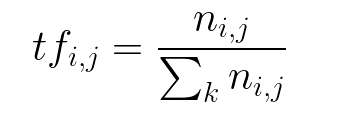

Inverse Data Frequency (idf): used to calculate the weight of rare words across all documents in the corpus. The words that occur rarely in the corpus have a high IDF score. It is given by the equation below.

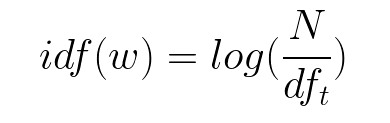

Combining these two we come up with the TF-IDF score (w) for a word in a document in the corpus. It is the product of tf and idf:

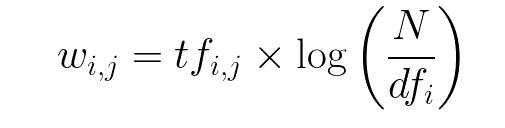


In [308]:
import re
import nltk
from nltk.corpus import stopwords
doc_text = " "

def preprocess_docs(text):
    text = str(text).lower()
    #print(text)
    text = re.sub('[^a-zA-z0-9\s]','',str(text))            
    text = text.split()  
    #print(text)
    text = [wl.lemmatize(word) for word in text if not word in stopwords.words('english')]
    new_text = ' '.join(text)
    #print("\ndoc : ", new_text)
        #doc_text = doc_text + new_text
            #doc_text = doc_text + new_text
        #print(new_text)
    return new_text
corpus = [text,text2]
#print(text)
text1 = preprocess_docs(text)
text2 = preprocess_docs(text2)
print("\n doc1",text1,"\nDoc 2",text2)


 doc1 million people india took part annual tree planting drive sunday 250 million sapling planted single day across country mostpopulous state campaign led uttar pradesh state government official lawmaker activist bid reduce carbon emission combat climate change tree planted sapling planted volunteer forest farm school along riverbank highway committed increasing forest cover uttar pradesh 15 total land area next five year said state forest official manoj singh according another government official forest cover state increased last year increase 127 sqare kilometer [79 sqare miles] forest cover uttar pradesh compared 2017 state government spokesperson quoted saying indian express newspaper also increase tree plant tree cover increased 305 compared national average 289 official said citing 2019 forest survey india report many sapling survive uttar pradesh state forest minister dara singh said longterm survival sapling remains concern adding usually 60 sapling survive rest succumb dise

In [309]:
first= text1
second= text2
#split so each word have their own string
first = first.split(" ")
second= second.split(" ")
#print(first,second)
total= set(first).union(set(second))
#print(total)
wordDictA = dict.fromkeys(total, 0) 
wordDictB = dict.fromkeys(total, 0)
for word in first:
    wordDictA[word]+=1
    
for word in second:
    wordDictB[word]+=1
#put them in a dataframe and then view the result:
pd.DataFrame([wordDictA, wordDictB])

,15,forest,celebrate,citing,many,agency,planting,six,62,operational,...,resounding,mobile,59,namely,ncc,statewide,geotagged,carry,target,pune
0,1,8,0,1,1,0,2,0,1,0,...,0,0,0,0,0,0,1,1,0,0
1,0,13,1,0,1,2,3,1,0,1,...,1,1,1,1,1,1,0,0,4,5


In [310]:
def computeTF(wordDict, bow):
    tfDict = {}
    bowCount = len(bow)
    for word, count in wordDict.items():
        tfDict[word] = count/float(bowCount)
    return tfDict
#running our sentences through the tf function:
tfFirst = computeTF(wordDictA, first)
tfSecond = computeTF(wordDictB, second)
#Converting to dataframe for visualization
tf_df= pd.DataFrame([tfFirst, tfSecond])
tf_df.head()


,15,forest,celebrate,citing,many,agency,planting,six,62,operational,...,resounding,mobile,59,namely,ncc,statewide,geotagged,carry,target,pune
0,0.004566,0.036530,0.000000,0.004566,0.004566,0.00000,0.009132,0.000000,0.004566,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004566,0.004566,0.000000,0.000000
1,0.000000,0.035422,0.002725,0.000000,0.002725,0.00545,0.008174,0.002725,0.000000,0.002725,...,0.002725,0.002725,0.002725,0.002725,0.002725,0.002725,0.000000,0.000000,0.010899,0.013624


In [311]:
def computeIDF(docList):
    idfDict = {}
    N = len(docList)
    
    idfDict = dict.fromkeys(docList[0].keys(), 0)
    for doc in docList:
        for word, val in doc.items():
            if val > 0:
                idfDict[word] += 1
    
    for word, val in idfDict.items():
        idfDict[word] = math.log10(N / float(val))
        
    return idfDict
#inputing our sentences in the log file
idfs = computeIDF([wordDictA, wordDictB])



In [312]:
idfs

{'15': 0.3010299956639812,
 'forest': 0.0,
 'celebrate': 0.3010299956639812,
 'citing': 0.3010299956639812,
 'many': 0.0,
 'agency': 0.3010299956639812,
 'planting': 0.0,
 'six': 0.3010299956639812,
 '62': 0.3010299956639812,
 'operational': 0.3010299956639812,
 'dedicated': 0.3010299956639812,
 'figure': 0.3010299956639812,
 'allocated': 0.3010299956639812,
 'sapling': 0.0,
 'department': 0.3010299956639812,
 'body': 0.3010299956639812,
 'mulshi': 0.3010299956639812,
 'teakwood': 0.3010299956639812,
 'division': 0.3010299956639812,
 'crore': 0.3010299956639812,
 'bjp': 0.3010299956639812,
 'district': 0.3010299956639812,
 'unavailability': 0.3010299956639812,
 'sqare': 0.3010299956639812,
 'uploaded': 0.3010299956639812,
 'consecutive': 0.3010299956639812,
 'kilometer': 0.3010299956639812,
 'mandatory': 0.3010299956639812,
 'exactly': 0.3010299956639812,
 'free': 0.3010299956639812,
 'consistency': 0.3010299956639812,
 'record': 0.0,
 'individual': 0.3010299956639812,
 'created': 0.30

In [313]:
def computeTFIDF(tfBow, idfs):
    tfidf = {}
    for word, val in tfBow.items():
        tfidf[word] = val*idfs[word]
    return tfidf
#running our two sentences through the IDF:
idfFirst = computeTFIDF(tfFirst, idfs)
idfSecond = computeTFIDF(tfSecond, idfs)
#putting it in a dataframe
idf= pd.DataFrame([idfFirst, idfSecond])

In [314]:
idf.transpose()

,0,1
15,0.001375,0.000000
forest,0.000000,0.000000
celebrate,0.000000,0.000820
citing,0.001375,0.000000
many,0.000000,0.000000
...,...,...
statewide,0.000000,0.000820
geotagged,0.001375,0.000000
carry,0.001375,0.000000
target,0.000000,0.003281
